In [25]:
#!pip install facebook-sdk
import json
import facebook
import requests
import pandas as pd
import numpy as np
import unicodedata
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Function which takes in the aguement page name and returns 25 recent posts on a given page

In [55]:
def getPosts(pageName):
    if pageName == 'English NEWJ':
        token = 'EAAER7L00fZAIBADij7UbgW2QrIvSrLQwunh2GCmhSYhIRCBd1cwcLvQm6ZB1S5f40MZBpHMORc4ZCMpvgAjxwcnZBszciZAZA1ZCtadhEeKjBWArZAr17s7rFiHXO5zsrXuyGRXb6OZAX5DkIQeHsMLR63fdaGWGFwXg7uZCnCoso3OkHckDPO6Cbh5ZCJDUqvAsB4AZD'
        page_id = '100589847991303' 
    elif pageName == 'Filmy':
        token = 'EAAlgYmp3afkBAGitxExzCyZAltBhnI50WaEkJlNBuecWNZAeZAG5PrsRX3sdDtr8qFUkXxe9Ka7UA3YDUQaeXpZBkZCz958Ap79oXLytSF5RBLPSwg4QEgKTLQt2G9NZB2ZCPgakSLXo5XapB91PNmwL2xe6tJtPdjTwkKfsVZCHP79Eh5ZBYVkm6pYL4LggHp9cItVjmLF2axwZDZD'
        page_id = '1954072204870360' 
    else:
        print("Invalid Choice")
    api = facebook.GraphAPI(token)  
    posts = api.get_connections(id=page_id,connection_name='posts',limit=100)
    paging = True      
    while paging:
            if 'paging' in posts:
                x = posts['paging']
                if 'next' in posts:
                    url = posts['next']
                    posts = requests.get(url).json()
                else:
                    paging = False
            else:
                    paging = False
    return posts
   

In [56]:
recent1=getPosts("Filmy")
recent1

GraphAPIError: Error validating access token: Session has expired on Saturday, 26-Sep-20 08:00:00 PDT. The current time is Saturday, 26-Sep-20 09:00:22 PDT.

In [39]:
recent2=getPosts("Filmy")
recent2

GraphAPIError: (#4) Application request limit reached

### Function which takes the object returned by the getPosts() function and returns comments on the 25 posts

In [30]:
def getComments(post):
    comments_df = []
    token = 'EAAlgYmp3afkBAGitxExzCyZAltBhnI50WaEkJlNBuecWNZAeZAG5PrsRX3sdDtr8qFUkXxe9Ka7UA3YDUQaeXpZBkZCz958Ap79oXLytSF5RBLPSwg4QEgKTLQt2G9NZB2ZCPgakSLXo5XapB91PNmwL2xe6tJtPdjTwkKfsVZCHP79Eh5ZBYVkm6pYL4LggHp9cItVjmLF2axwZDZD'
    api = facebook.GraphAPI(token)
    for i in post['data']:
        temp = dict()
        comms = api.get_connections(id=i['id'], connection_name='comments', summary = 'TRUE')
        count = 0
        allcoms = {}
        paging = True
        allcoms[count] = comms['data'].copy()
        count+=1
        while paging:
            if 'paging' in comms:
                x = comms['paging']
                if 'next' in x:
                    url = x['next']
                    comms = requests.get(url).json()
                    allcoms[count] = comms['data'].copy()
                    count+=1
                else:
                    paging = False
            else:
                paging = False
        if('message' in i.keys()):
            temp['post_id'] = i['id']
            temp['video_title'] = i['message']
        #temp['video_title'] = i['story']
            temp['posted_date'] = i['created_time']
        allcomments = []
        for element in allcoms:
            entry = allcoms[element]
            for j in entry:
                allcomments.append(j['message'])
        temp['comments_text'] = allcomments
        temp['comments_count'] = len(allcomments)
        comments_df.append(temp.copy())    
    pd.set_option('display.max_colwidth', 100)
    return(pd.DataFrame(comments_df))

In [31]:
#recent1 = getPosts('Filmy NEWJ')
inputdf1 = getComments(recent1)
inputdf1['comments'] = inputdf1['comments_text'].apply(lambda x: ','.join(map(str, x)))
inputdf1

,post_id,video_title,posted_date,comments_text,comments_count,comments
0,1954072204870360_743586719553436,संयुक्त राष्ट्र से प्रधानमंत्री मोदी का संबोधन LIVE,2020-09-26T13:02:12+0000,[Jis desh ke farmer ko suiside karna padta he jis desh ki me cow polithin khane ke liye majbur h...,202,Jis desh ke farmer ko suiside karna padta he jis desh ki me cow polithin khane ke liye majbur ho...
1,1954072204870360_2779596808984558,सुनिए संयुक्त राष्ट्र संघ में दिया सुषमा स्वराज जी का वो भाषण जिसमें उड़ा दी थीं उन्होंने पाकिस्...,2020-09-26T12:37:13+0000,"[Best Foreign Minister ever, सुषमा जी के बोल सदैव उत्तम रहे हैं।, देश के शहीद क्रान्तिकारियों को...",12,"Best Foreign Minister ever,सुषमा जी के बोल सदैव उत्तम रहे हैं।,देश के शहीद क्रान्तिकारियों को आत..."
2,1954072204870360_2779532385657667,इमरान खान के भाषण के बाद संयुक्त राष्ट्र महासभा में भारत सामने लाया पाक का असल चेहरा. कहा - पीओक...,2020-09-26T10:53:44+0000,[Wel said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt...,44,Wel said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt....
3,1954072204870360_2778771109067128,"लॉकडाउन के दौरान इंजीनियरिंग के इन छात्रों ने बना डाली इलेक्ट्रिक बाइक, ढाई घंटे चार्ज करने पर च...",2020-09-26T09:05:01+0000,"[Good work.. 👌, How much cost ? Give me this bike and I want to ride \nCongratulations ]",2,"Good work.. 👌,How much cost ? Give me this bike and I want to ride \nCongratulations"
4,1954072204870360_2777620425848863,"राम मंदिर की आहट से ही अयोध्या को मिली ताकत, विकास होता देख बढ़े ज़मीनों के दाम",2020-09-26T06:35:00+0000,"[Jay shree ram, आज मेरा हृदय अत्यंत प्रशन्न है ।\nजय जय श्री राम 🙏🙏, जय श्री राम जी🙏🙏🚩🚩🚩🚩, जय श...",27,"Jay shree ram,आज मेरा हृदय अत्यंत प्रशन्न है ।\nजय जय श्री राम 🙏🙏,जय श्री राम जी🙏🙏🚩🚩🚩🚩,जय श्री ..."
5,1954072204870360_2778524735758432,"वो सरदार जो रहा सालों तक असरदार, जन्मदिन मुबारक मनमोहन सिंह जी\n\nIndian National Congress",2020-09-26T04:35:07+0000,"[Banda tha well educated lekin congress Mai akar silent Ho gya, Best example of a man in the wro...",132,"Banda tha well educated lekin congress Mai akar silent Ho gya,Best example of a man in the wrong..."
6,1954072204870360_2777564979187741,"अपनी आवाज से अच्छे-अच्छों को हैरान कर देने वाले ये हैं साईराम अय्यर, दो आवाजों के साथ-साथ कई भाष...",2020-09-26T02:34:00+0000,"[Very good talent, Very good, My best friend sairamiyer, ईश्वर की कृपा आप पर बनी रहे ।, Amazing...",39,"Very good talent,Very good,My best friend sairamiyer,ईश्वर की कृपा आप पर बनी रहे ।,Amazing,Very..."
7,1954072204870360_2778799512397621,निजाम रेस्टोरेंट - जहां हुई थी कोलकाता के मशहूर काठी रोल की शुरूआत. जानिए क्यों और कैसे यहां पहल...,2020-09-25T17:05:00+0000,"[Still remember these rolls from Nizaam , Price ke sath batate uske menu ke sath to aur maja aa ...",2,"Still remember these rolls from Nizaam ,Price ke sath batate uske menu ke sath to aur maja aa jata"
8,1954072204870360_2778829155727990,मजाक है क्या लद्दाख का अलग हो जाना है? क्या ऐसे कश्मीर और लद्दाख को बनाया जा सकता है मजाक का मुद...,2020-09-25T16:17:38+0000,[सही कहा था किसी ने 1947 में गंदा पानी बह कर पाकिस्तान चला गया पर गढ़ो में कुछ गंदा पानी जमा रह ...,778,सही कहा था किसी ने 1947 में गंदा पानी बह कर पाकिस्तान चला गया पर गढ़ो में कुछ गंदा पानी जमा रह ग...
9,1954072204870360_2778695565741349,मुंबई की सड़क पर आपस में भिड़े टीवी पत्रकार. पुलिस और दूसरे पत्रकारों को करना पड़ा बीच-बचाव,2020-09-25T15:05:00+0000,"[republic sabse age he is liye abp jalta he. 😎😎😎I support arnb and pradip Bhandri., We Support ...",60,"republic sabse age he is liye abp jalta he. 😎😎😎I support arnb and pradip Bhandri.,We Support Re..."


In [33]:
inputdf1.to_excel("filmycom1.xlsx")

In [32]:
inputdf1[["comments_text"]].count()

comments_text    40
dtype: int64

In [37]:
#recent1 = getPosts('Filmy NEWJ')
inputdf2 = getComments(recent2)
inputdf2['comments'] = inputdf2['comments_text'].apply(lambda x: ','.join(map(str, x)))
inputdf2

KeyError: 'data'

In [32]:
inputdf2[["comments_text"]].count()

comments_text    40
dtype: int64

In [33]:
inputdf1.to_excel("filmycom1.xlsx")

In [40]:
inputdf1

,post_id,video_title,posted_date,comments_text,comments_count,comments
0,1954072204870360_743586719553436,संयुक्त राष्ट्र से प्रधानमंत्री मोदी का संबोधन LIVE,2020-09-26T13:02:12+0000,[Jis desh ke farmer ko suiside karna padta he jis desh ki me cow polithin khane ke liye majbur h...,202,Jis desh ke farmer ko suiside karna padta he jis desh ki me cow polithin khane ke liye majbur ho...
1,1954072204870360_2779596808984558,सुनिए संयुक्त राष्ट्र संघ में दिया सुषमा स्वराज जी का वो भाषण जिसमें उड़ा दी थीं उन्होंने पाकिस्...,2020-09-26T12:37:13+0000,"[Best Foreign Minister ever, सुषमा जी के बोल सदैव उत्तम रहे हैं।, देश के शहीद क्रान्तिकारियों को...",12,"Best Foreign Minister ever,सुषमा जी के बोल सदैव उत्तम रहे हैं।,देश के शहीद क्रान्तिकारियों को आत..."
2,1954072204870360_2779532385657667,इमरान खान के भाषण के बाद संयुक्त राष्ट्र महासभा में भारत सामने लाया पाक का असल चेहरा. कहा - पीओक...,2020-09-26T10:53:44+0000,[Wel said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt...,44,Wel said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt....
3,1954072204870360_2778771109067128,"लॉकडाउन के दौरान इंजीनियरिंग के इन छात्रों ने बना डाली इलेक्ट्रिक बाइक, ढाई घंटे चार्ज करने पर च...",2020-09-26T09:05:01+0000,"[Good work.. 👌, How much cost ? Give me this bike and I want to ride \nCongratulations ]",2,"Good work.. 👌,How much cost ? Give me this bike and I want to ride \nCongratulations"
4,1954072204870360_2777620425848863,"राम मंदिर की आहट से ही अयोध्या को मिली ताकत, विकास होता देख बढ़े ज़मीनों के दाम",2020-09-26T06:35:00+0000,"[Jay shree ram, आज मेरा हृदय अत्यंत प्रशन्न है ।\nजय जय श्री राम 🙏🙏, जय श्री राम जी🙏🙏🚩🚩🚩🚩, जय श...",27,"Jay shree ram,आज मेरा हृदय अत्यंत प्रशन्न है ।\nजय जय श्री राम 🙏🙏,जय श्री राम जी🙏🙏🚩🚩🚩🚩,जय श्री ..."
5,1954072204870360_2778524735758432,"वो सरदार जो रहा सालों तक असरदार, जन्मदिन मुबारक मनमोहन सिंह जी\n\nIndian National Congress",2020-09-26T04:35:07+0000,"[Banda tha well educated lekin congress Mai akar silent Ho gya, Best example of a man in the wro...",132,"Banda tha well educated lekin congress Mai akar silent Ho gya,Best example of a man in the wrong..."
6,1954072204870360_2777564979187741,"अपनी आवाज से अच्छे-अच्छों को हैरान कर देने वाले ये हैं साईराम अय्यर, दो आवाजों के साथ-साथ कई भाष...",2020-09-26T02:34:00+0000,"[Very good talent, Very good, My best friend sairamiyer, ईश्वर की कृपा आप पर बनी रहे ।, Amazing...",39,"Very good talent,Very good,My best friend sairamiyer,ईश्वर की कृपा आप पर बनी रहे ।,Amazing,Very..."
7,1954072204870360_2778799512397621,निजाम रेस्टोरेंट - जहां हुई थी कोलकाता के मशहूर काठी रोल की शुरूआत. जानिए क्यों और कैसे यहां पहल...,2020-09-25T17:05:00+0000,"[Still remember these rolls from Nizaam , Price ke sath batate uske menu ke sath to aur maja aa ...",2,"Still remember these rolls from Nizaam ,Price ke sath batate uske menu ke sath to aur maja aa jata"
8,1954072204870360_2778829155727990,मजाक है क्या लद्दाख का अलग हो जाना है? क्या ऐसे कश्मीर और लद्दाख को बनाया जा सकता है मजाक का मुद...,2020-09-25T16:17:38+0000,[सही कहा था किसी ने 1947 में गंदा पानी बह कर पाकिस्तान चला गया पर गढ़ो में कुछ गंदा पानी जमा रह ...,778,सही कहा था किसी ने 1947 में गंदा पानी बह कर पाकिस्तान चला गया पर गढ़ो में कुछ गंदा पानी जमा रह ग...
9,1954072204870360_2778695565741349,मुंबई की सड़क पर आपस में भिड़े टीवी पत्रकार. पुलिस और दूसरे पत्रकारों को करना पड़ा बीच-बचाव,2020-09-25T15:05:00+0000,"[republic sabse age he is liye abp jalta he. 😎😎😎I support arnb and pradip Bhandri., We Support ...",60,"republic sabse age he is liye abp jalta he. 😎😎😎I support arnb and pradip Bhandri.,We Support Re..."


### Importing the required libraries for the Sentiment Analysis

In [45]:
# importing for ipywidgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [46]:
#import to filter warnings
import warnings
warnings.filterwarnings('ignore')
#!pip install numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.pyplot import xticks
%matplotlib inline
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(16,10)})
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1)
#!pip install wordcloud
#!pip install -U textblob

In [47]:
import calendar
import datetime as dt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('movie_reviews')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.corpus import movie_reviews

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [48]:
neg=[ 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't","not","don't","dont","do not","won't"]

In [49]:
eng_stopwords = stopwords.words('english')
eng_stopwords = [x for x in eng_stopwords if x not in neg]

In [133]:
posts_to_be_analysed=inputdf1[(inputdf1.comments_count>40) & (inputdf1.comments_count<50) ]

In [191]:
#!pip install demoji
#! pip install emoji
import demoji
import emoji
import re
#demoji.download_code()

In [202]:
newcomms=[]
emojifree=[]
for i in posts_to_be_analysed.comments:
    new_i=re.sub(emoji.get_emoji_regexp(), r"", i)
    emojifree.append(new_i)


In [203]:
posts_to_be_analysed["new"]=emojifree

In [19]:
inputdf1['comments_text_translated'] = inputdf1.translated_comments.apply(lambda x: ','.join(map(str, x)))
#inputdf1[['comments_text_translated','video_title']]

In [218]:
posts_to_be_analysed.new = posts_to_be_analysed.new.str.strip('()').str.split(',')

In [219]:
posts_to_be_analysed

,post_id,video_title,posted_date,comments_text,comments_count,comments,translated_comments,translated_comms,new,newlist
2,1954072204870360_2779532385657667,इमरान खान के भाषण के बाद संयुक्त राष्ट्र महासभा में भारत सामने लाया पाक का असल चेहरा. कहा - पीओके को खाली करे पाकिस्तान,2020-09-26T10:53:44+0000,"[Wel said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt. And Pakistan Army, Yes Pakistan is terrorist production country, DARU PE KE NASHA CHARHA.NASHE MEIN DEYA MOOT..CHINA KE MAA KA BHOSHDA..PORKISTAN POOPKISTAN💩💩💩💩KE MAA KE CHOOT....WRITEN BY🙏🏻🙏🏽🙏🏾🙏🏼MOTA BHAI GUJRAT WALLE🙏🏻🙏🏼🙏🏽🙏🏾, good reaction of our nation, World ke jitne bhi aatankwadi hain vah sare Pakistan mein milenge, Zoota khan khali karow p o k kab tak chini ke piche chupga... Himmat hai to samnese war kar paki kutye.., पाकिस्तान को एक ऎसी पूंछ का वारसा मिला है जिसे काटी जा सकती है लेकिन सीधी नहीं की जा सकती!, Terorist ka baap imran sala aise hi bolega jab tak takhtapalat nahi hoga, Jitni shiddat se ye india india karta hai, isko india ki citizenship de deni chaiye with a govt job in his beloved kashmir. Aab fir chahe iske deshshatgard aa k isko hi uda dein ya fir dehshatgardi band ho jaye inki , Great reply, Abe gadhe apne products par dhyan de .... Sukhi rahega. Bharat Anekta me Ekta ka desh hai ., Pakistan pm fraud, Good, U can bark as much as u want...bt Evry nation knw tht pakistan is bikhari/terrorist...., Pakistan is atankistan stank kee factory., bhai bahut bahut bahut Achcha Jay Hind, Katora Khan jhoothistan, भारत माता कि जय, Vdiya khich ke rhko kam bai....., Jai Bharat Mata ki, Abe harami halala ki paidaish sale imran Khan kamina kutta RSS RSS ek Desh ka sangathan hai yah Jo kabhi e hathiyar nahin uthata na uske pass hathiyar Hain vah desh bhakton ka ek sangathan hai tumhare is pakistaniyon ko dhul mein chatane ke liye RSS kafi hai Jay Hind Jay Bharat harami imran Khan saale halala ki aulad Pakistan murdabad Hindustan jindabad, , Piyo ki Khali karo, Pakistan murdabad, madrachod Imran Khan, good reaction of our nation, जय हिंद 🇮🇳 🇮🇳, Good reaction of our nation., करारा जवाब, Imran ki ma ka bhosda, Let be human, Pakistan murdabad, Nikal la...De ,😂😂, Good, Pakistan pm fraud, Jai Bharat Mata ki, Pakistan murdabad, Jai hind sir, Great reply, , , , , ]",44,"Wel said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt. And Pakistan Army,Yes Pakistan is terrorist production country,DARU PE KE NASHA CHARHA.NASHE MEIN DEYA MOOT..CHINA KE MAA KA BHOSHDA..PORKISTAN POOPKISTAN💩💩💩💩KE MAA KE CHOOT....WRITEN BY🙏🏻🙏🏽🙏🏾🙏🏼MOTA BHAI GUJRAT WALLE🙏🏻🙏🏼🙏🏽🙏🏾,good reaction of our nation,World ke jitne bhi aatankwadi hain vah sare Pakistan mein milenge,Zoota khan khali karow p o k kab tak chini ke piche chupga... Himmat hai to samnese war kar paki kutye..,पाकिस्तान को एक ऎसी पूंछ का वारसा मिला है जिसे काटी जा सकती है लेकिन सीधी नहीं की जा सकती!,Terorist ka baap imran sala aise hi bolega jab tak takhtapalat nahi hoga,Jitni shiddat se ye india india karta hai, isko india ki citizenship de deni chaiye with a govt job in his beloved kashmir. Aab fir chahe iske deshshatgard aa k isko hi uda dein ya fir dehshatgardi band ho jaye inki ,Great reply,Abe gadhe apne products par dhyan de .... Sukhi rahega. Bharat Anekta me Ekta ka desh hai .,Pakistan pm fraud,Good,U can bark as much as u want...bt Evry nation knw tht pakistan is bikhari/terrorist....,Pakistan is atankistan stank kee factory.,bhai bahut bahut bahut Achcha Jay Hind,Katora Khan jhoothistan,भारत माता कि जय,Vdiya khich ke rhko kam bai.....,Jai Bharat Mata ki,Abe harami halala ki paidaish sale imran Khan kamina kutta RSS RSS ek Desh ka sangathan hai yah Jo kabhi e hathiyar nahin uthata na uske pass hathiyar Hain vah desh bhakton ka ek sangathan hai tumhare is pakistaniyon ko dhul mein chatane ke liye RSS kafi hai Jay Hind Jay Bharat harami imran Khan saale halala ki aulad Pakistan murdabad Hindustan jindabad,,Piyo ki Khali karo,Pakistan murdabad,madrachod Imran 

### Function for translation

In [136]:
from googletrans import Translator
translator = Translator()

In [137]:
translations_list=[]
def translatorfunc(comm_df):
    for i in comm_df.comments_text:
        translations = translator.translate(i,dest='en')
        tr_list=[]
        for i in translations:
            tr_list.append(i.text)
        translations_list.append(tr_list)
    comm_df["translated_comments"]=translations_list
    return comm_df

In [138]:
translatorfunc(posts_to_be_analysed)

,post_id,video_title,posted_date,comments_text,comments_count,comments,translated_comments
2,1954072204870360_2779532385657667,इमरान खान के भाषण के बाद संयुक्त राष्ट्र महासभा में भारत सामने लाया पाक का असल चेहरा. कहा - पीओके को खाली करे पाकिस्तान,2020-09-26T10:53:44+0000,"[Wel said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt. And Pakistan Army, Yes Pakistan is terrorist production country, DARU PE KE NASHA CHARHA.NASHE MEIN DEYA MOOT..CHINA KE MAA KA BHOSHDA..PORKISTAN POOPKISTAN💩💩💩💩KE MAA KE CHOOT....WRITEN BY🙏🏻🙏🏽🙏🏾🙏🏼MOTA BHAI GUJRAT WALLE🙏🏻🙏🏼🙏🏽🙏🏾, good reaction of our nation, World ke jitne bhi aatankwadi hain vah sare Pakistan mein milenge, Zoota khan khali karow p o k kab tak chini ke piche chupga... Himmat hai to samnese war kar paki kutye.., पाकिस्तान को एक ऎसी पूंछ का वारसा मिला है जिसे काटी जा सकती है लेकिन सीधी नहीं की जा सकती!, Terorist ka baap imran sala aise hi bolega jab tak takhtapalat nahi hoga, Jitni shiddat se ye india india karta hai, isko india ki citizenship de deni chaiye with a govt job in his beloved kashmir. Aab fir chahe iske deshshatgard aa k isko hi uda dein ya fir dehshatgardi band ho jaye inki , Great reply, Abe gadhe apne products par dhyan de .... Sukhi rahega. Bharat Anekta me Ekta ka desh hai ., Pakistan pm fraud, Good, U can bark as much as u want...bt Evry nation knw tht pakistan is bikhari/terrorist...., Pakistan is atankistan stank kee factory., bhai bahut bahut bahut Achcha Jay Hind, Katora Khan jhoothistan, भारत माता कि जय, Vdiya khich ke rhko kam bai....., Jai Bharat Mata ki, Abe harami halala ki paidaish sale imran Khan kamina kutta RSS RSS ek Desh ka sangathan hai yah Jo kabhi e hathiyar nahin uthata na uske pass hathiyar Hain vah desh bhakton ka ek sangathan hai tumhare is pakistaniyon ko dhul mein chatane ke liye RSS kafi hai Jay Hind Jay Bharat harami imran Khan saale halala ki aulad Pakistan murdabad Hindustan jindabad, , Piyo ki Khali karo, Pakistan murdabad, madrachod Imran Khan, good reaction of our nation, जय हिंद 🇮🇳 🇮🇳, Good reaction of our nation., करारा जवाब, Imran ki ma ka bhosda, Let be human, Pakistan murdabad, Nikal la...De ,😂😂, Good, Pakistan pm fraud, Jai Bharat Mata ki, Pakistan murdabad, Jai hind sir, Great reply, , , , , ]",44,"Wel said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt. And Pakistan Army,Yes Pakistan is terrorist production country,DARU PE KE NASHA CHARHA.NASHE MEIN DEYA MOOT..CHINA KE MAA KA BHOSHDA..PORKISTAN POOPKISTAN💩💩💩💩KE MAA KE CHOOT....WRITEN BY🙏🏻🙏🏽🙏🏾🙏🏼MOTA BHAI GUJRAT WALLE🙏🏻🙏🏼🙏🏽🙏🏾,good reaction of our nation,World ke jitne bhi aatankwadi hain vah sare Pakistan mein milenge,Zoota khan khali karow p o k kab tak chini ke piche chupga... Himmat hai to samnese war kar paki kutye..,पाकिस्तान को एक ऎसी पूंछ का वारसा मिला है जिसे काटी जा सकती है लेकिन सीधी नहीं की जा सकती!,Terorist ka baap imran sala aise hi bolega jab tak takhtapalat nahi hoga,Jitni shiddat se ye india india karta hai, isko india ki citizenship de deni chaiye with a govt job in his beloved kashmir. Aab fir chahe iske deshshatgard aa k isko hi uda dein ya fir dehshatgardi band ho jaye inki ,Great reply,Abe gadhe apne products par dhyan de .... Sukhi rahega. Bharat Anekta me Ekta ka desh hai .,Pakistan pm fraud,Good,U can bark as much as u want...bt Evry nation knw tht pakistan is bikhari/terrorist....,Pakistan is atankistan stank kee factory.,bhai bahut bahut bahut Achcha Jay Hind,Katora Khan jhoothistan,भारत माता कि जय,Vdiya khich ke rhko kam bai.....,Jai Bharat Mata ki,Abe harami halala ki paidaish sale imran Khan kamina kutta RSS RSS ek Desh ka sangathan hai yah Jo kabhi e hathiyar nahin uthata na uske pass hathiyar Hain vah desh bhakton ka ek sangathan hai tumhare is pakistaniyon ko dhul mein chatane ke liye RSS kafi hai Jay Hind Jay Bharat harami imran Khan saale halala ki aulad Pakistan murdabad Hindustan jindabad,,Piyo ki Khali karo,Pakistan murdabad,madrachod Imran Khan,good reaction of our nat

In [139]:
posts_to_be_analysed[["comments","translated_comments"]]

,comments,translated_comments
2,"Wel said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt. And Pakistan Army,Yes Pakistan is terrorist production country,DARU PE KE NASHA CHARHA.NASHE MEIN DEYA MOOT..CHINA KE MAA KA BHOSHDA..PORKISTAN POOPKISTAN💩💩💩💩KE MAA KE CHOOT....WRITEN BY🙏🏻🙏🏽🙏🏾🙏🏼MOTA BHAI GUJRAT WALLE🙏🏻🙏🏼🙏🏽🙏🏾,good reaction of our nation,World ke jitne bhi aatankwadi hain vah sare Pakistan mein milenge,Zoota khan khali karow p o k kab tak chini ke piche chupga... Himmat hai to samnese war kar paki kutye..,पाकिस्तान को एक ऎसी पूंछ का वारसा मिला है जिसे काटी जा सकती है लेकिन सीधी नहीं की जा सकती!,Terorist ka baap imran sala aise hi bolega jab tak takhtapalat nahi hoga,Jitni shiddat se ye india india karta hai, isko india ki citizenship de deni chaiye with a govt job in his beloved kashmir. Aab fir chahe iske deshshatgard aa k isko hi uda dein ya fir dehshatgardi band ho jaye inki ,Great reply,Abe gadhe apne products par dhyan de .... Sukhi rahega. Bharat Anekta me Ekta ka desh hai .,Pakistan pm fraud,Good,U can bark as much as u want...bt Evry nation knw tht pakistan is bikhari/terrorist....,Pakistan is atankistan stank kee factory.,bhai bahut bahut bahut Achcha Jay Hind,Katora Khan jhoothistan,भारत माता कि जय,Vdiya khich ke rhko kam bai.....,Jai Bharat Mata ki,Abe harami halala ki paidaish sale imran Khan kamina kutta RSS RSS ek Desh ka sangathan hai yah Jo kabhi e hathiyar nahin uthata na uske pass hathiyar Hain vah desh bhakton ka ek sangathan hai tumhare is pakistaniyon ko dhul mein chatane ke liye RSS kafi hai Jay Hind Jay Bharat harami imran Khan saale halala ki aulad Pakistan murdabad Hindustan jindabad,,Piyo ki Khali karo,Pakistan murdabad,madrachod Imran Khan,good reaction of our nation,जय हिंद 🇮🇳 🇮🇳,Good reaction of our nation.,करारा जवाब,Imran ki ma ka bhosda,Let be human,Pakistan murdabad,Nikal la...De ,😂😂,Good,Pakistan pm fraud,Jai Bharat Mata ki,Pakistan murdabad,Jai hind sir,Great reply,,,,,","[Well said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt. And Pakistan Army, Yes Pakistan is terrorist production country, DARU PE KE NASHA CHARHA.NASHE MEIN DEYA MOOT..CHINA KE MAA KA BHOSHDA..PORKISTAN POOPKISTAN💩💩💩💩KE MAA KE CHOOT .... WRITEN BY🙏🏻🙏🏽🙏🏾🙏🏼MOTA BHAI GUJRAT WALLE🙏🏻🙏 4, good reaction of our nation, All the terrorists of the world will meet in Surrey Pakistan, Shoe khan khali karo ko o k ki kab ko chitga ki chupte hai… If you dare, then you can fight in front of you., Pakistan has got an inheritance of a tail that can be cut but not straightened!, The father of the Terrorist, Emraan, will speak like this until the coup., Jitni shiddat se ye india india karta hai, isko india ki citizenship de deni chaiye with a govt job in his beloved kashmir. Aab fir chahe iske deshshatgard aa k isko hi uda dein ya fir dehshatgardi band ho jaye inki, Great reply, Abe ass pay attention to your products .... will be happy. India is a country of unity in diversity., Pakistan pm fraud, Good, U can bark as much as u want...bt Evry nation knw tht pakistan is bikhari/terrorist...., Pakistan is atankistan stank kee factory., Brother very much very good jai hind, Khatora Khan liehistan, Bharat mata ki jai, Hold on to me, Jai Bharat Mata Ki, Abe harami halala ki paidaish sale imran khan kamina kutta RSS RSS Jay bharat harami imran khan saale halala ki aulad pakistan murdabad hindustan jindabad, , Empty the drink, Pakistan murdabad, Teacher Imran Khan, good reaction of our nation, Jai Hind 🇮🇳 🇮🇳, Good reaction of our nation., Retort, Imran's mother's Bhosada, Let be human, Pakistan murdabad, Nikal la ... De, 😂😂, Good, Pakistan pm fraud, Jai Bharat Mata Ki, Pakistan murdabad, J Hind Sir, Great reply, , , , , ]"
14,"एक पोस्टर बीजेपी के कुलदीप का भी लगा दो,अगर कोर्ट से बरी हो गया तो उसकी इज्जत कैसे वापस की जाएगी यह भी बताए आज के दौर में 80% ऐसे मामले आपसी रंजिश में लगा दिए जाते है,कभी पुरूषों का भी ख्याल करें,Very good,Very good,Esa kya kar diya h ji best h pa

In [149]:
comm_of_all_posts=[]
comm_of_one_post=[]
one_comm=[]
each_comm=[]
for i in posts_to_be_analysed.comments_text:
    each_comm=[]
    for k in i:
        each_comm.append(k)
    one_comm.append(each_comm)


each_comm

['एक पोस्टर बीजेपी के कुलदीप का भी लगा दो',
 'अगर कोर्ट से बरी हो गया तो उसकी इज्जत कैसे वापस की जाएगी यह भी बताए आज के दौर में 80% ऐसे मामले आपसी रंजिश में लगा दिए जाते है',
 'कभी पुरूषों का भी ख्याल करें',
 'Very good',
 'Very good',
 'Esa kya kar diya h ji best h paglo ki sarkar h',
 'Yogi is best cm',
 'धन्य हो योगी सरकार 🙏',
 'Good',
 'He Should Be Next Prime Minister Of India 🙏',
 'जय हो योगी बाबा',
 'कुलदीप सेंगर का फोटो सबसे पहले लगाया जाना चाहिए वह बलात्कारी है',
 'Absolutely right binu bhai hohi n priti',
 'अच्छा कदम है, सबसे पहले चिन्मयानंद और सेंगर का डालना चाहिए ।',
 'Thank thankyou Jogi ji',
 'Very good sir Jay hind',
 'लगाना जरूर यह मत बोलना कि उसके लिए पैसे कम पड़ गए',
 'Thank you Yogi ji. Jai Shree Ram',
 'Yogi g sabse Best cm jai shree ram',
 'Ek dum perfect',
 'Aur agar poster lagwa hi rahe ho toh wo poster wapas kar do jo samajwaadi party ne Sengar chinmyanand ke lagwaye thhe',
 'Babar ke pillow ke liye Bhari dikkat Jay Jay Yogi',
 'Very good yogi ji ',
 '',
 'Ganje

## USE THIS for Translation Accurately

In [220]:
commns_all_trans=[]
trans_list=[]
for i in posts_to_be_analysed.new:
    translations = translator.translate(i,dest='en')
    tr_list=[]
    for trans in translations:
        tr_list.append(trans.text)
    trans_list.append(tr_list)
trans_list

[['Well said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt. And Pakistan Army',
  'Yes Pakistan is terrorist production country',
  "Daru PK drugged. Weak in the nose..Choshna of China's mother..Pakistan Pakistan's mother's waiver .... Vriten's insured brother Gujarat",
  'good reaction of our nation',
  'All the terrorists of the world will meet in Surrey Pakistan',
  'Shoe khan khali karo ko o k ki kab ko chitga ki chupte hai… If you dare, then you can fight in front of you.',
  'Pakistan has got an inheritance of a tail that can be cut but not straightened!',
  'The father of the Terrorist, Emraan, will speak like this until the coup.',
  'This is as strongly as India does India',
  'isko india ki citizenship de deni chaiye with a govt job in his beloved kashmir. Aab fir chahe iske deshshatgard aa k isko hi uda dein ya fir dehshatgardi band ho jaye inki',
  'Great reply',
  'Abe ass pay attention to your products .... will be happy. India is 

In [185]:
commns_all_trans=[]
trans_list=[]
for i in posts_to_be_analysed.comments_text:
    translations = translator.translate(i,dest='en')
    tr_list=[]
    for trans in translations:
        tr_list.append(trans.text)
    trans_list.append(tr_list)
trans_list

[['Well said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt. And Pakistan Army',
  'Yes Pakistan is terrorist production country',
  'DARU PE KE NASHA CHARHA.NASHE MEIN DEYA MOOT..CHINA KE MAA KA BHOSHDA..PORKISTAN POOPKISTAN💩💩💩💩KE MAA KE CHOOT .... WRITEN BY🙏🏻🙏🏽🙏🏾🙏🏼MOTA BHAI GUJRAT WALLE🙏🏻🙏 4',
  'good reaction of our nation',
  'All the terrorists of the world will meet in Surrey Pakistan',
  'Shoe khan khali karo ko o k ki kab ko chitga ki chupte hai… If you dare, then you can fight in front of you.',
  'Pakistan has got an inheritance of a tail that can be cut but not straightened!',
  'The father of the Terrorist, Emraan, will speak like this until the coup.',
  'Jitni shiddat se ye india india karta hai, isko india ki citizenship de deni chaiye with a govt job in his beloved kashmir. Aab fir chahe iske deshshatgard aa k isko hi uda dein ya fir dehshatgardi band ho jaye inki',
  'Great reply',
  'Abe ass pay attention to your products .... w

In [221]:
#commns_all_trans.append(translations_list)
posts_to_be_analysed["translated_comms"]=trans_list
posts_to_be_analysed[["comments","translated_comms"]]

,comments,translated_comms
2,"Wel said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt. And Pakistan Army,Yes Pakistan is terrorist production country,DARU PE KE NASHA CHARHA.NASHE MEIN DEYA MOOT..CHINA KE MAA KA BHOSHDA..PORKISTAN POOPKISTAN💩💩💩💩KE MAA KE CHOOT....WRITEN BY🙏🏻🙏🏽🙏🏾🙏🏼MOTA BHAI GUJRAT WALLE🙏🏻🙏🏼🙏🏽🙏🏾,good reaction of our nation,World ke jitne bhi aatankwadi hain vah sare Pakistan mein milenge,Zoota khan khali karow p o k kab tak chini ke piche chupga... Himmat hai to samnese war kar paki kutye..,पाकिस्तान को एक ऎसी पूंछ का वारसा मिला है जिसे काटी जा सकती है लेकिन सीधी नहीं की जा सकती!,Terorist ka baap imran sala aise hi bolega jab tak takhtapalat nahi hoga,Jitni shiddat se ye india india karta hai, isko india ki citizenship de deni chaiye with a govt job in his beloved kashmir. Aab fir chahe iske deshshatgard aa k isko hi uda dein ya fir dehshatgardi band ho jaye inki ,Great reply,Abe gadhe apne products par dhyan de .... Sukhi rahega. Bharat Anekta me Ekta ka desh hai .,Pakistan pm fraud,Good,U can bark as much as u want...bt Evry nation knw tht pakistan is bikhari/terrorist....,Pakistan is atankistan stank kee factory.,bhai bahut bahut bahut Achcha Jay Hind,Katora Khan jhoothistan,भारत माता कि जय,Vdiya khich ke rhko kam bai.....,Jai Bharat Mata ki,Abe harami halala ki paidaish sale imran Khan kamina kutta RSS RSS ek Desh ka sangathan hai yah Jo kabhi e hathiyar nahin uthata na uske pass hathiyar Hain vah desh bhakton ka ek sangathan hai tumhare is pakistaniyon ko dhul mein chatane ke liye RSS kafi hai Jay Hind Jay Bharat harami imran Khan saale halala ki aulad Pakistan murdabad Hindustan jindabad,,Piyo ki Khali karo,Pakistan murdabad,madrachod Imran Khan,good reaction of our nation,जय हिंद 🇮🇳 🇮🇳,Good reaction of our nation.,करारा जवाब,Imran ki ma ka bhosda,Let be human,Pakistan murdabad,Nikal la...De ,😂😂,Good,Pakistan pm fraud,Jai Bharat Mata ki,Pakistan murdabad,Jai hind sir,Great reply,,,,,","[Well said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt. And Pakistan Army, Yes Pakistan is terrorist production country, Daru PK drugged. Weak in the nose..Choshna of China's mother..Pakistan Pakistan's mother's waiver .... Vriten's insured brother Gujarat, good reaction of our nation, All the terrorists of the world will meet in Surrey Pakistan, Shoe khan khali karo ko o k ki kab ko chitga ki chupte hai… If you dare, then you can fight in front of you., Pakistan has got an inheritance of a tail that can be cut but not straightened!, The father of the Terrorist, Emraan, will speak like this until the coup., This is as strongly as India does India, isko india ki citizenship de deni chaiye with a govt job in his beloved kashmir. Aab fir chahe iske deshshatgard aa k isko hi uda dein ya fir dehshatgardi band ho jaye inki, Great reply, Abe ass pay attention to your products .... will be happy. India is a country of unity in diversity., Pakistan pm fraud, Good, U can bark as much as u want...bt Evry nation knw tht pakistan is bikhari/terrorist...., Pakistan is atankistan stank kee factory., Brother very much very good jai hind, Khatora Khan liehistan, Bharat mata ki jai, Hold on to me, Jai Bharat Mata Ki, Abe harami halala ki paidaish sale imran khan kamina kutta RSS RSS Jay bharat harami imran khan saale halala ki aulad pakistan murdabad hindustan jindabad, , Empty the drink, Pakistan murdabad, Teacher Imran Khan, good reaction of our nation, Jai Hind, Good reaction of our nation., Retort, Imran's mother's Bhosada, Let be human, Pakistan murdabad, Nikal la ... De, , Good, Pakistan pm fraud, Jai Bharat Mata Ki, Pakistan murdabad, J Hind Sir, Great reply, , , , , ]"
14,"एक पोस्टर बीजेपी के कुलदीप का भी लगा दो,अगर कोर्ट से बरी हो गया तो उसकी इज्जत कैसे वापस की जाएगी यह भी बताए आज के दौर में 80% ऐसे मामले आपसी रंजिश में लगा दिए जाते है,कभी पुरूषों का भी ख्याल करें,Very good,Very good,Esa kya kar diya h ji best h paglo ki sarkar h,Yogi is best cm,धन्य ह

In [222]:
for i in posts_to_be_analysed.new:
    translations = translator.translate(i,dest='en')
    for trans in translations:
        print(f'{trans.origin} -> {trans.text}')


Wel said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt. And Pakistan Army -> Well said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt. And Pakistan Army
Yes Pakistan is terrorist production country -> Yes Pakistan is terrorist production country
DARU PE KE NASHA CHARHA.NASHE MEIN DEYA MOOT..CHINA KE MAA KA BHOSHDA..PORKISTAN POOPKISTANKE MAA KE CHOOT....WRITEN BYMOTA BHAI GUJRAT WALLE -> Daru PK drugged. Weak in the nose..Choshna of China's mother..Pakistan Pakistan's mother's waiver .... Vriten's insured brother Gujarat
good reaction of our nation -> good reaction of our nation
World ke jitne bhi aatankwadi hain vah sare Pakistan mein milenge -> All the terrorists of the world will meet in Surrey Pakistan
Zoota khan khali karow p o k kab tak chini ke piche chupga... Himmat hai to samnese war kar paki kutye.. -> Shoe khan khali karo ko o k ki kab ko chitga ki chupte hai… If you dare, then you can fight in 

In [224]:
posts_to_be_analysed[["comments","translated_comms"]]

,comments,translated_comms
2,"Wel said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt. And Pakistan Army,Yes Pakistan is terrorist production country,DARU PE KE NASHA CHARHA.NASHE MEIN DEYA MOOT..CHINA KE MAA KA BHOSHDA..PORKISTAN POOPKISTAN💩💩💩💩KE MAA KE CHOOT....WRITEN BY🙏🏻🙏🏽🙏🏾🙏🏼MOTA BHAI GUJRAT WALLE🙏🏻🙏🏼🙏🏽🙏🏾,good reaction of our nation,World ke jitne bhi aatankwadi hain vah sare Pakistan mein milenge,Zoota khan khali karow p o k kab tak chini ke piche chupga... Himmat hai to samnese war kar paki kutye..,पाकिस्तान को एक ऎसी पूंछ का वारसा मिला है जिसे काटी जा सकती है लेकिन सीधी नहीं की जा सकती!,Terorist ka baap imran sala aise hi bolega jab tak takhtapalat nahi hoga,Jitni shiddat se ye india india karta hai, isko india ki citizenship de deni chaiye with a govt job in his beloved kashmir. Aab fir chahe iske deshshatgard aa k isko hi uda dein ya fir dehshatgardi band ho jaye inki ,Great reply,Abe gadhe apne products par dhyan de .... Sukhi rahega. Bharat Anekta me Ekta ka desh hai .,Pakistan pm fraud,Good,U can bark as much as u want...bt Evry nation knw tht pakistan is bikhari/terrorist....,Pakistan is atankistan stank kee factory.,bhai bahut bahut bahut Achcha Jay Hind,Katora Khan jhoothistan,भारत माता कि जय,Vdiya khich ke rhko kam bai.....,Jai Bharat Mata ki,Abe harami halala ki paidaish sale imran Khan kamina kutta RSS RSS ek Desh ka sangathan hai yah Jo kabhi e hathiyar nahin uthata na uske pass hathiyar Hain vah desh bhakton ka ek sangathan hai tumhare is pakistaniyon ko dhul mein chatane ke liye RSS kafi hai Jay Hind Jay Bharat harami imran Khan saale halala ki aulad Pakistan murdabad Hindustan jindabad,,Piyo ki Khali karo,Pakistan murdabad,madrachod Imran Khan,good reaction of our nation,जय हिंद 🇮🇳 🇮🇳,Good reaction of our nation.,करारा जवाब,Imran ki ma ka bhosda,Let be human,Pakistan murdabad,Nikal la...De ,😂😂,Good,Pakistan pm fraud,Jai Bharat Mata ki,Pakistan murdabad,Jai hind sir,Great reply,,,,,","[Well said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt. And Pakistan Army, Yes Pakistan is terrorist production country, Daru PK drugged. Weak in the nose..Choshna of China's mother..Pakistan Pakistan's mother's waiver .... Vriten's insured brother Gujarat, good reaction of our nation, All the terrorists of the world will meet in Surrey Pakistan, Shoe khan khali karo ko o k ki kab ko chitga ki chupte hai… If you dare, then you can fight in front of you., Pakistan has got an inheritance of a tail that can be cut but not straightened!, The father of the Terrorist, Emraan, will speak like this until the coup., This is as strongly as India does India, isko india ki citizenship de deni chaiye with a govt job in his beloved kashmir. Aab fir chahe iske deshshatgard aa k isko hi uda dein ya fir dehshatgardi band ho jaye inki, Great reply, Abe ass pay attention to your products .... will be happy. India is a country of unity in diversity., Pakistan pm fraud, Good, U can bark as much as u want...bt Evry nation knw tht pakistan is bikhari/terrorist...., Pakistan is atankistan stank kee factory., Brother very much very good jai hind, Khatora Khan liehistan, Bharat mata ki jai, Hold on to me, Jai Bharat Mata Ki, Abe harami halala ki paidaish sale imran khan kamina kutta RSS RSS Jay bharat harami imran khan saale halala ki aulad pakistan murdabad hindustan jindabad, , Empty the drink, Pakistan murdabad, Teacher Imran Khan, good reaction of our nation, Jai Hind, Good reaction of our nation., Retort, Imran's mother's Bhosada, Let be human, Pakistan murdabad, Nikal la ... De, , Good, Pakistan pm fraud, Jai Bharat Mata Ki, Pakistan murdabad, J Hind Sir, Great reply, , , , , ]"
14,"एक पोस्टर बीजेपी के कुलदीप का भी लगा दो,अगर कोर्ट से बरी हो गया तो उसकी इज्जत कैसे वापस की जाएगी यह भी बताए आज के दौर में 80% ऐसे मामले आपसी रंजिश में लगा दिए जाते है,कभी पुरूषों का भी ख्याल करें,Very good,Very good,Esa kya kar diya h ji best h paglo ki sarkar h,Yogi is best cm,धन्य ह

In [227]:
posts_to_be_analysed["cleaned_comments"] = posts_to_be_analysed.translated_comms.apply(lambda x: ','.join(map(str, x)))
#inputdf1[['comments_text_translated','video_title']]

In [232]:
posts_to_be_analysed[["video_title","comments_count","new","cleaned_comments"]]

,video_title,comments_count,new,cleaned_comments
2,इमरान खान के भाषण के बाद संयुक्त राष्ट्र महासभा में भारत सामने लाया पाक का असल चेहरा. कहा - पीओके को खाली करे पाकिस्तान,44,"[Wel said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt. And Pakistan Army, Yes Pakistan is terrorist production country, DARU PE KE NASHA CHARHA.NASHE MEIN DEYA MOOT..CHINA KE MAA KA BHOSHDA..PORKISTAN POOPKISTANKE MAA KE CHOOT....WRITEN BYMOTA BHAI GUJRAT WALLE, good reaction of our nation, World ke jitne bhi aatankwadi hain vah sare Pakistan mein milenge, Zoota khan khali karow p o k kab tak chini ke piche chupga... Himmat hai to samnese war kar paki kutye.., पाकिस्तान को एक ऎसी पूंछ का वारसा मिला है जिसे काटी जा सकती है लेकिन सीधी नहीं की जा सकती!, Terorist ka baap imran sala aise hi bolega jab tak takhtapalat nahi hoga, Jitni shiddat se ye india india karta hai, isko india ki citizenship de deni chaiye with a govt job in his beloved kashmir. Aab fir chahe iske deshshatgard aa k isko hi uda dein ya fir dehshatgardi band ho jaye inki , Great reply, Abe gadhe apne products par dhyan de .... Sukhi rahega. Bharat Anekta me Ekta ka desh hai ., Pakistan pm fraud, Good, U can bark as much as u want...bt Evry nation knw tht pakistan is bikhari/terrorist...., Pakistan is atankistan stank kee factory., bhai bahut bahut bahut Achcha Jay Hind, Katora Khan jhoothistan, भारत माता कि जय, Vdiya khich ke rhko kam bai....., Jai Bharat Mata ki, Abe harami halala ki paidaish sale imran Khan kamina kutta RSS RSS ek Desh ka sangathan hai yah Jo kabhi e hathiyar nahin uthata na uske pass hathiyar Hain vah desh bhakton ka ek sangathan hai tumhare is pakistaniyon ko dhul mein chatane ke liye RSS kafi hai Jay Hind Jay Bharat harami imran Khan saale halala ki aulad Pakistan murdabad Hindustan jindabad, , Piyo ki Khali karo, Pakistan murdabad, madrachod Imran Khan, good reaction of our nation, जय हिंद , Good reaction of our nation., करारा जवाब, Imran ki ma ka bhosda, Let be human, Pakistan murdabad, Nikal la...De , , Good, Pakistan pm fraud, Jai Bharat Mata ki, Pakistan murdabad, Jai hind sir, Great reply, , , , , ]","Well said sir. Pakistan is a safe country for terrorist organization. Shame on you Pakistan govt. And Pakistan Army,Yes Pakistan is terrorist production country,Daru PK drugged. Weak in the nose..Choshna of China's mother..Pakistan Pakistan's mother's waiver .... Vriten's insured brother Gujarat,good reaction of our nation,All the terrorists of the world will meet in Surrey Pakistan,Shoe khan khali karo ko o k ki kab ko chitga ki chupte hai… If you dare, then you can fight in front of you.,Pakistan has got an inheritance of a tail that can be cut but not straightened!,The father of the Terrorist, Emraan, will speak like this until the coup.,This is as strongly as India does India,isko india ki citizenship de deni chaiye with a govt job in his beloved kashmir. Aab fir chahe iske deshshatgard aa k isko hi uda dein ya fir dehshatgardi band ho jaye inki,Great reply,Abe ass pay attention to your products .... will be happy. India is a country of unity in diversity.,Pakistan pm fraud,Good,U can bark as much as u want...bt Evry nation knw tht pakistan is bikhari/terrorist....,Pakistan is atankistan stank kee factory.,Brother very much very good jai hind,Khatora Khan liehistan,Bharat mata ki jai,Hold on to me,Jai Bharat Mata Ki,Abe harami halala ki paidaish sale imran khan kamina kutta RSS RSS Jay bharat harami imran khan saale halala ki aulad pakistan murdabad hindustan jindabad,,Empty the drink,Pakistan murdabad,Teacher Imran Khan,good reaction of our nation,Jai Hind,Good reaction of our nation.,Retort,Imran's mother's Bhosada,Let be human,Pakistan murdabad,Nikal la ... De,,Good,Pakistan pm fraud,Jai Bharat Mata Ki,Pakistan murdabad,J Hind Sir,Great reply,,,,,"
14,महिलाओं से अपराध करने वालों के अब शहरों में पोस्टर लगवाएगी योगी सरकार. अपराधियों की अगर की मदद तो साथी का भी छपेगा पोस्टर\n\nMYogiAdityanath,45,"[एक पोस्टर बीजेपी के कुल

### Function for sentiment

In [230]:
def get_Sentiment(video_data):
    titles=[]
    sentiment_on_video=[]
    subjectivity_on_video=[]
    sentim=[]
    subjec=[]
    postId=[]
    clas=[]
    pos=[]
    neg=[]
   
        
    for video in video_data.video_title:
        #videodata_final=video_data[video_data.comments_count>20]
        comments_words = video_data.loc[video_data['video_title'] == video].cleaned_comments.str.lower().str.cat(sep=' ').split()
        #comments_as_text_block=" ".join(comments_words)
        #tokenizer = RegexpTokenizer(r'\w+')
        #result = tokenizer.tokenize(comments_as_text_block)
        #text = " ".join(result)
        #tokens_stopwords = word_tokenize(text)
        no_stopwords_tokens = [word for word in comments_words if not word in stopwords.words()]
    #print(no_stopwords_tokens)
    #print(text_tokens)
        textblock_without_stopwords=" ".join(no_stopwords_tokens)
        #textblock_with_stopwords=" ".join(tokens_stopwords)
        sent          = TextBlob(textblock_without_stopwords)
        polarity      = sent.sentiment.polarity
        subjectivity  = sent.sentiment.subjectivity
        #sent          = TextBlob(text, analyzer = NaiveBayesAnalyzer())
        #classification= sent.sentiment.classification
        #positive      = sent.sentiment.p_pos
        #negative      = sent.sentiment.p_neg
        if (polarity <0.1 and polarity >= 0):
            Senti="Neutral"
        elif (polarity >= 0.1 and polarity<0.4):
            Senti=" Slightly Positive"
        elif (polarity >= 0.4 and polarity<=0.5):
            Senti="Positive"
        elif (polarity > 0.5):
            Senti=" Highly Positive"
        elif (polarity <= -0.3):
            Senti=" Highly Negative"
        else:
            Senti="Negative"
        if (subjectivity <0.2):
            Subj="Objective"
        elif (subjectivity >0.2 and subjectivity >= 0.4):
            Subj="Slightly Subjective"
        elif (subjectivity >0.4 and subjectivity >= 0.6):
            Subj="Subjective"
        else:
            Subj="Highly Subjective"

        subjec.append(subjectivity)
        sentim.append(polarity)
        subjectivity_on_video.append(Subj)
        sentiment_on_video.append(Senti)
        #clas.append(classification)
        #pos.append(positive)
        #neg.append(negative)
    for title in video_data.video_title:
        titles.append(title)
    
    for i in video_data.post_id:
        postId.append(i)
    global Sentiment
    data={'post_Id': postId,'Video_Title': titles, 'Sentiment on Video': sentiment_on_video, 
          'Subjectivity on Video': subjectivity_on_video,'Sentiment_Value':sentim,
          'Subjectivity value':subjec}#'Classification':classification, 'postive_value':positive,'negative_value':negative}
    Sentiment=pd.DataFrame(data)
    return Sentiment
    

In [231]:
get_Sentiment(posts_to_be_analysed)

,post_Id,Video_Title,Sentiment on Video,Subjectivity on Video,Sentiment_Value,Subjectivity value
0,1954072204870360_2779532385657667,इमरान खान के भाषण के बाद संयुक्त राष्ट्र महासभा में भारत सामने लाया पाक का असल चेहरा. कहा - पीओके को खाली करे पाकिस्तान,Positive,Slightly Subjective,0.422619,0.665476
1,1954072204870360_2778450849099154,महिलाओं से अपराध करने वालों के अब शहरों में पोस्टर लगवाएगी योगी सरकार. अपराधियों की अगर की मदद तो साथी का भी छपेगा पोस्टर\n\nMYogiAdityanath,Slightly Positive,Slightly Subjective,0.369767,0.502521


In [325]:
def hinglish_sentiment():
    from googletrans import Translator
    translator = Translator()
    textblock=str(input("TEXT FOR WHICH SENTIMENT IS NEEDED:    "))
    #translator.detect(text)
    trtxt=translator.translate(textblock,dest='en')
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(trtxt.text)
    #tokens_stopwords = word_tokenize(text)
    #tokens_stopwords
    #no_stopwords_tokens_without_negations = [word for word in tokens if not word in stopwords.words()]
    no_stopwords_tokens_with_neg = [word for word in tokens if not word in eng_stopwords]

    #textblock_without_negation=" ".join(no_stopwords_tokens_without_negations)
    textblock_with_negation=" ".join(no_stopwords_tokens_with_neg)
    sent1          = TextBlob(textblock_with_negation)
    polarity      = sent1.sentiment.polarity
    subjectivity  = sent1.sentiment.subjectivity
    #sentiment_of_post          = TextBlob(textblock_with_negation, analyzer = NaiveBayesAnalyzer())
    #classification= sent1.sentiment.classification
    #positive      = sent.sentiment.p_pos
    #negative      = sent.sentiment.p_neg
    if (polarity <0.1 and polarity >= 0):
            Sentiment_of_post="Neutral"
    elif (polarity >= 0.1 and polarity<0.4):
            Sentiment_of_post=" Slightly Positive"
    elif (polarity >= 0.4 and polarity<=0.5):
            Sentiment_of_post="Positive"
    elif (polarity > 0.5):
            Sentiment_of_post=" Highly Positive"
    elif (polarity <= -0.3):
            Sentiment_of_post=" Highly Negative"
    else:
            Sentiment_of_post="Negative"
    if (subjectivity <0.2):
            Subj="Objective"
    elif (subjectivity >0.2 and subjectivity >= 0.4):
            Subj="Slightly Subjective"
    elif (subjectivity >0.4 and subjectivity >= 0.6):
            Subj="Subjective"
    else:
            Subj="Highly Subjective"

    wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(textblock_with_negation)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    #plt.show()
    return print("\n\n","SAME TEXT IN ENGLISH:     ",trtxt.text,"\n\n","STOPWORDS_REMOVED:      ",sent1,"\n\n","POLARITY ON THE POST COMMENTS: ",round(polarity,2),"indicating a ,round(polarity,2) Sentiment :",Sentiment_of_post)

TEXT FOR WHICH SENTIMENT IS NEEDED:     kya bola jaaye, ye bohot hi khubsurt hai




 SAME TEXT IN ENGLISH:      What to say, it is very beautiful 

 STOPWORDS_REMOVED:       What say beautiful 

 POLARITY ON THE POST COMMENTS:  0.85 indicating a ,round(polarity,2) Sentiment :  Highly Positive


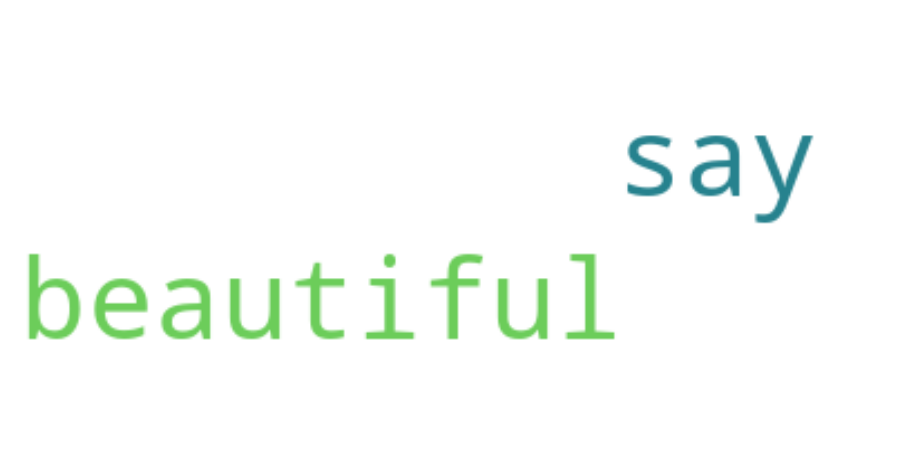

In [326]:
hinglish_sentiment()